In [482]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [483]:
DATASET_PATH = '../course_project_train.csv'
TEST_DATASET_PATH = '../course_project_test.csv'

In [484]:
train_data = pd.read_csv('course_project_train.csv')
test_data = pd.read_csv('course_project_test.csv')

In [485]:
train_data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [486]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [487]:
np.log(np.exp(2))

2.0

<AxesSubplot:>

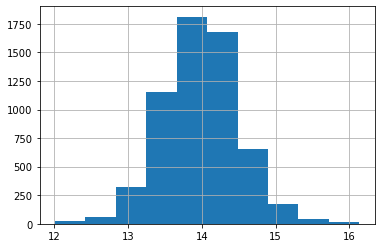

In [488]:
np.log(train_data['Annual Income']).hist()

<AxesSubplot:>

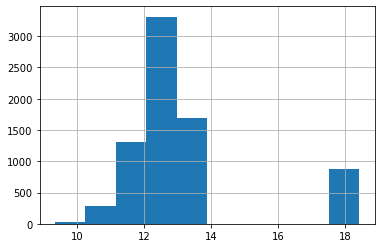

In [489]:
np.log(train_data['Current Loan Amount']).hist()

In [490]:
train_data['Months since last delinquent'].sort_values().dropna()

5705      0.0
4995      0.0
4938      0.0
3063      0.0
257       0.0
        ...  
4682     84.0
428      86.0
5202     91.0
5214     92.0
4191    118.0
Name: Months since last delinquent, Length: 3419, dtype: float64

In [491]:
train_data.shape

(7500, 17)

In [492]:
train_data['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

In [493]:
train_data['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [494]:
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [495]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [496]:
train_data['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [497]:
train_data['Years in current job'] = train_data['Years in current job'].fillna('unemployed')
test_data['Years in current job'] = test_data['Years in current job'].fillna('unemployed')

In [498]:
train_data['Annual Income'] = train_data['Annual Income'].fillna(0)
test_data['Annual Income'] = test_data['Annual Income'].fillna(0)

In [499]:
train_data['Months since last delinquent']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
7495     NaN
7496    43.0
7497     NaN
7498     NaN
7499     NaN
Name: Months since last delinquent, Length: 7500, dtype: float64

In [500]:
train_data['Months since last delinquent'].unique()

array([ nan,  73.,  18.,   6.,  40.,  44.,  45.,  17.,  61.,  14.,  11.,
        32.,  75.,  65.,  10.,  28.,  35.,  29.,  13.,   8.,  71.,  54.,
        21.,  68.,  51.,  70.,  19.,  22.,  16.,  38.,  36.,   0.,  34.,
        30.,   3.,  52.,  72.,  63.,  23.,   5.,  60.,  59.,   1.,  74.,
         4.,  42.,  39.,  41.,  55.,  67.,  37.,  47.,  26.,  76.,  43.,
        12.,   7.,  77.,  48.,  79.,  80.,  31.,  64.,  78.,  20.,  58.,
        49.,   9.,  69.,  25.,  33.,  15.,  57.,  86.,  62.,   2.,  24.,
        56.,  82.,  66.,  46.,  27.,  50.,  53.,  81.,  83., 118.,  84.,
        91.,  92.])

In [501]:
train_data['Has delinquent'] = train_data['Months since last delinquent'].isna()
train_data['Has delinquent'] = train_data['Has delinquent'].replace(True, 1)
train_data['Has delinquent'] = train_data['Has delinquent'].replace(False, 0)

test_data['Has delinquent'] = test_data['Months since last delinquent'].isna()
test_data['Has delinquent'] = test_data['Has delinquent'].replace(True, 1)
test_data['Has delinquent'] = test_data['Has delinquent'].replace(False, 0)

In [502]:
train_data

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Has delinquent
0,Own Home,482087.0,unemployed,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,1
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0,1
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1,0
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0,1
7498,Home Mortgage,0.0,unemployed,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0,1


In [503]:
train_data['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [504]:
train_data['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [505]:
train_data['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [506]:
train_data['Bankruptcies'] = train_data['Bankruptcies'].fillna(0)
test_data['Bankruptcies'] = test_data['Bankruptcies'].fillna(0)

In [507]:
train_data = train_data.drop(['Credit Score', 'Tax Liens', 'Months since last delinquent'], axis = 1)
test_data = test_data.drop(['Credit Score', 'Tax Liens', 'Months since last delinquent'], axis = 1)

In [508]:
train_data = pd.get_dummies(train_data,columns = ['Home Ownership','Purpose','Years in current job','Term'])
test_data = pd.get_dummies(test_data,columns = ['Home Ownership','Purpose','Years in current job','Term'])

In [509]:
train_data

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Default,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_unemployed,Term_Long Term,Term_Short Term
0,482087.0,11.0,26.3,685960.0,1.0,1.0,99999999.0,47386.0,7914.0,0,...,0,0,0,0,0,0,0,1,0,1
1,1025487.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,18373.0,1,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,11.0,35.0,1182434.0,0.0,0.0,99999999.0,308389.0,13651.0,0,...,0,0,0,0,1,0,0,0,0,1
3,805068.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,11338.0,0,...,0,0,1,0,0,0,0,0,0,1
4,776264.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,7180.0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,3.0,8.5,107866.0,0.0,0.0,129360.0,73492.0,1900.0,0,...,0,0,0,0,0,0,1,0,0,1
7496,1533984.0,10.0,26.5,686312.0,0.0,0.0,444048.0,456399.0,12783.0,1,...,0,0,0,0,0,0,0,0,1,0
7497,1878910.0,12.0,32.1,1778920.0,0.0,0.0,99999999.0,477812.0,12479.0,0,...,0,0,1,0,0,0,0,0,0,1
7498,0.0,21.0,26.5,1141250.0,0.0,0.0,615274.0,476064.0,37118.0,0,...,0,0,0,0,0,0,0,1,0,1


In [510]:
X = train_data.drop(['Credit Default'], axis=1)
y = train_data['Credit Default']

In [511]:
scaler = StandardScaler()

In [512]:
scaler.fit(X)
X = scaler.transform(X)

In [513]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [514]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [515]:
y_pred = lr_model.predict(X_val)

In [516]:
accuracy_score(y_pred, y_val)

0.722

In [517]:
f1_score(y_pred, y_val, average='macro')

0.5298120225299345

In [518]:
test_data

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Has delinquent,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Years in current job_unemployed,Term_Long Term,Term_Short Term
0,0.0,9.0,12.5,220968.0,0.0,0.0,162470.0,105906.0,6813.0,0,...,1,0,0,0,0,0,0,0,0,1
1,231838.0,6.0,32.7,55946.0,0.0,0.0,78298.0,46037.0,2318.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1152540.0,10.0,13.7,204600.0,0.0,0.0,200178.0,146490.0,18729.0,1,...,0,0,0,0,0,0,0,0,0,1
3,1220313.0,16.0,17.0,456302.0,0.0,0.0,217382.0,213199.0,27559.0,0,...,0,0,0,0,0,0,0,0,0,1
4,2340952.0,11.0,23.6,1207272.0,0.0,0.0,777634.0,425391.0,42605.0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1020053.0,14.0,29.1,559152.0,1.0,1.0,99999999.0,162735.0,15046.0,0,...,0,0,0,0,0,0,0,0,0,1
2496,0.0,15.0,17.0,1737780.0,0.0,0.0,468512.0,1439269.0,32996.0,0,...,0,0,0,0,0,0,0,0,0,1
2497,1171806.0,48.0,12.8,1706430.0,0.0,0.0,430496.0,676438.0,36912.0,1,...,0,0,0,0,0,0,0,0,0,1
2498,723520.0,14.0,28.8,945780.0,0.0,0.0,257774.0,391248.0,13506.0,1,...,0,0,0,0,0,0,0,0,0,1


In [519]:
test_pred = lr_model.predict(test_data)

ValueError: X has 42 features per sample; expecting 43

In [481]:
pd.DataFrame({'Credit Default': test_pred}).to_csv('predictions.csv', index=False)

NameError: name 'test_pred' is not defined